## Customer Segmentation for Automobile Company

<u>Context</u>

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

<u>Content</u>

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

Acknowledgements

https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

Inspiration

https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

Dataset Source

https://www.kaggle.com/vetrirah/customer

### __1. Data Preprocessing__ 

The first step in building the model is to importing Libraries and understanding features within the unprocessed dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

__a. Sample Submission Data__

In [3]:
df1 = pd.read_csv('./Files/sample_submission.csv')
df1.head()

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A


In [4]:
listItem = []
for col in df1.columns:
    listItem.append([col, df1[col].dtype,
                   df1[col].isna().sum(),
                   round((df1[col].isna().sum()/len(df1[col])) *100, 2),
                   df1[col].nunique(), list(df1[col].unique()[:5])]);

df1Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df1Desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,2627,"[458989, 458994, 458996, 459000, 459001]"
1,Segmentation,object,0,0.0,1,[A]


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0


__b. Train and Test Data__

Columns Explanation:

- Work_Experience = customer's work experience in Years.
- Graduated = indication whether the customer has graduated.
- Family_Size = Number of family members including the customer.
- Spending_Score = Spending score of the customer.
- Var_1 = Anonymised Category for the customer.
- Segmentation = (target) Customer Segment of the Customer.

Dataframe preparation

In [6]:
dfTr = pd.read_csv('./Files/Train.csv')
dfTr.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
dfTs = pd.read_csv('./Files/Test.csv')
dfTs.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [8]:
print(dfTr.shape)
print(dfTs.shape)

(8068, 11)
(2627, 10)


Comments:

- The train data has 8068 rows, and 11 columns. 
- Whereas the test data consists of 2627 rows and 10 columns.
- The test data has 1 less column, which is due to "Segmentation" being the target.
- Thus, the ratio of train to test data is 3:1 which is quite good for the model. 24.5% of the whole data available for the model training.

__c. Dataframe Information__

__c.1. Train Dataframe__

In [9]:
#Function to describe Dataframe

def describeDF(x):
    listItem = []
    for col in x.columns:
        listItem.append([col, x[col].dtype,
                       x[col].isna().sum(),
                       round((x[col].isna().sum()/len(x[col])) *100, 2),
                       x[col].nunique(), list(x[col].unique()[:5])]);

    desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                         data=listItem)
    return desc

In [10]:
describeDF(dfTr)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,8068,"[462809, 462643, 466315, 461735, 462669]"
1,Gender,object,0,0.00,2,"[Male, Female]"
2,Ever_Married,object,140,1.74,2,"[No, Yes, nan]"
3,Age,int64,0,0.00,67,"[22, 38, 67, 40, 56]"
4,Graduated,object,78,0.97,2,"[No, Yes, nan]"
5,Profession,object,124,1.54,9,"[Healthcare, Engineer, Lawyer, Entertainment, ..."
6,Work_Experience,float64,829,10.28,15,"[1.0, nan, 0.0, 4.0, 9.0]"
7,Spending_Score,object,0,0.00,3,"[Low, Average, High]"
8,Family_Size,float64,335,4.15,9,"[4.0, 3.0, 1.0, 2.0, 6.0]"
9,Var_1,object,76,0.94,7,"[Cat_4, Cat_6, Cat_7, Cat_3, Cat_1]"


In [11]:
dfTr.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


Comments:

- There are a very high percentage of null value (10.28%) in Work_Experience which might affect the model later on. This is perhaps due to the unwillingness of customer to state their job, or they are still looking for a steady job.
- Family_Size has 4.15 % of null value, meaning that some user prefer to keep their privacy.
- Ever_Married, Profession, Graduated and Var_1 both have less than 2% of null value.
- Must consider what to do with the null value, since it might affect the model performance.

__more comments on the statistic distribution__

__c.2. Test Dataframe__

In [12]:
describeDF(dfTs)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,2627,"[458989, 458994, 458996, 459000, 459001]"
1,Gender,object,0,0.00,2,"[Female, Male]"
2,Ever_Married,object,50,1.90,2,"[Yes, No, nan]"
3,Age,int64,0,0.00,67,"[36, 37, 69, 59, 19]"
4,Graduated,object,24,0.91,2,"[Yes, No, nan]"
5,Profession,object,38,1.45,9,"[Engineer, Healthcare, nan, Executive, Marketing]"
6,Work_Experience,float64,269,10.24,15,"[0.0, 8.0, 11.0, nan, 5.0]"
7,Spending_Score,object,0,0.00,3,"[Low, Average, High]"
8,Family_Size,float64,113,4.30,9,"[1.0, 4.0, 2.0, 5.0, 3.0]"
9,Var_1,object,32,1.22,7,"[Cat_6, Cat_4, Cat_3, nan, Cat_1]"


In [13]:
dfTs.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Work_Experience,2358.0,2.552587,3.341094,0.0,0.0,1.0,4.0,14.0
Family_Size,2514.0,2.825378,1.551906,1.0,2.0,2.0,4.0,9.0


Comments:
- The test data is also filled with most null data in Work_Experience, which means this might be quite an important feature in determining the Segmentation.
- Overall, the features with most null values are also similar with the train data.

### __2. Exploratory Data Analysis (EDA)__

__A. Data Analization and Visualization__

Based on the high percentage of null values in Train Data, columns that contain null values in order are as follow (including the datatypes):

1. Work_Experience - 10.28% - float64
2. Family_Size - 4.15% - float64
3. Ever_Married - 1.74% - object
4. Profession - 1.54% - object
5. Graduated - 0.97% - object
6. Var_1 - 0.94% - object

- The top 2 null percentages are numerical data, whereas the others are categorical data.

- Although the percentages are different within the Test Data, the patterns are quite similar. So, let's explore these data first to figure out what methods will be used to handle the null values.

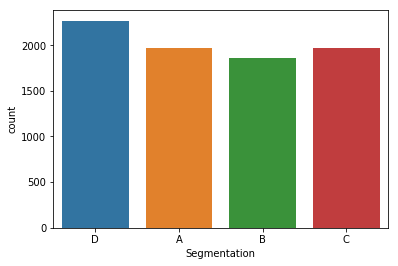

In [14]:
sns.countplot(dfTr['Segmentation'])

__A.1. Work Experience and Family Size Influence on the Segmentation__

In [15]:
# Duplicate Train Data to Modify without changing the initial value
trMod = dfTr.copy(deep=True)

# Encoding the Segmentation Columns categorical data into numerical to ease the analysation
trMod['Segmentation'] = trMod['Segmentation'].apply(lambda val: 1 if val=='A' 
                                                    else(2 if val=='B' 
                                                         else(3 if val=='C' else 4)))

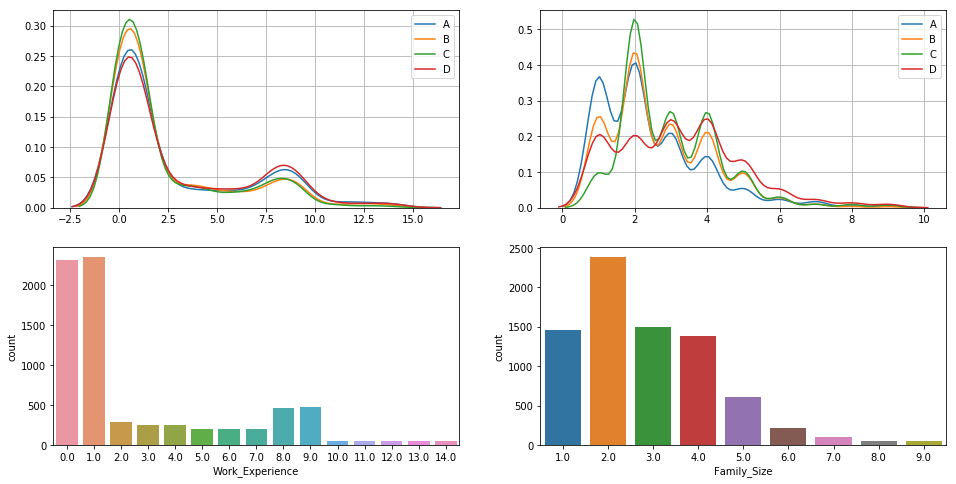

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.kdeplot(trMod[trMod['Segmentation'] == 1]['Work_Experience'].dropna(), label = 'A')
sns.kdeplot(trMod[trMod['Segmentation'] == 2]['Work_Experience'].dropna(), label = 'B')
sns.kdeplot(trMod[trMod['Segmentation'] == 3]['Work_Experience'].dropna(), label = 'C')
sns.kdeplot(trMod[trMod['Segmentation'] == 4]['Work_Experience'].dropna(), label = 'D')
plt.grid(True)

plt.subplot(2,2,2)
sns.kdeplot(trMod[trMod['Segmentation'] == 1]['Family_Size'].dropna(), label = 'A')
sns.kdeplot(trMod[trMod['Segmentation'] == 2]['Family_Size'].dropna(), label = 'B')
sns.kdeplot(trMod[trMod['Segmentation'] == 3]['Family_Size'].dropna(), label = 'C')
sns.kdeplot(trMod[trMod['Segmentation'] == 4]['Family_Size'].dropna(), label = 'D')
plt.grid(True)


plt.subplot(2,2,3)
sns.countplot(trMod['Work_Experience'].dropna())

plt.subplot(2,2,4)
sns.countplot(trMod['Family_Size'])


- On the plot for Work_Experience, it can be seen that the patterns are quite similar between each Segmentation. The peak can be seen the most within the 0 and 1 value, then it is constant until the value 8 and 9. From 10 to the rest, is quite a low count.

- In Family_Size plot, it can be seen that Segmentation C has the lowest user number in Family_Size of 1 compare to the other Segmentations. However, in the highest frequency of Family_Size which is 2, it can be seen that Segmentation C has the most user. A high frequency of Segmentation A seems to be found in Family Size of 1, whereas it's the lowest in Family_Size of 4. 

- From this, we can conclude that perhaps the feature Family_Size has a certain influence towards the Segmentations. Whereas the Work_Experience doesn't contribute as significant as Family_Size. However, we must evaluate more to confirm this hypothesis.

__A.2. Numerical Data Influences Toward Segmentation__

In [17]:
# Duplicating Training Data, and labeling the target columns with One Hot Encoder

oneHot1 = dfTr.copy(deep=True)
oneHot1['Segmentation'] = pd.Categorical(oneHot1['Segmentation'])
dfDummies = pd.get_dummies(oneHot1['Segmentation'], prefix = 'Segm')
oneHot2 = pd.concat([oneHot1, dfDummies], axis=1).drop('Segmentation',
                                                       axis = 1)
oneHot2.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segm_A,Segm_B,Segm_C,Segm_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0,0,0,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1,0,0,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,0,1,0,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,0,1,0,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1,0,0,0


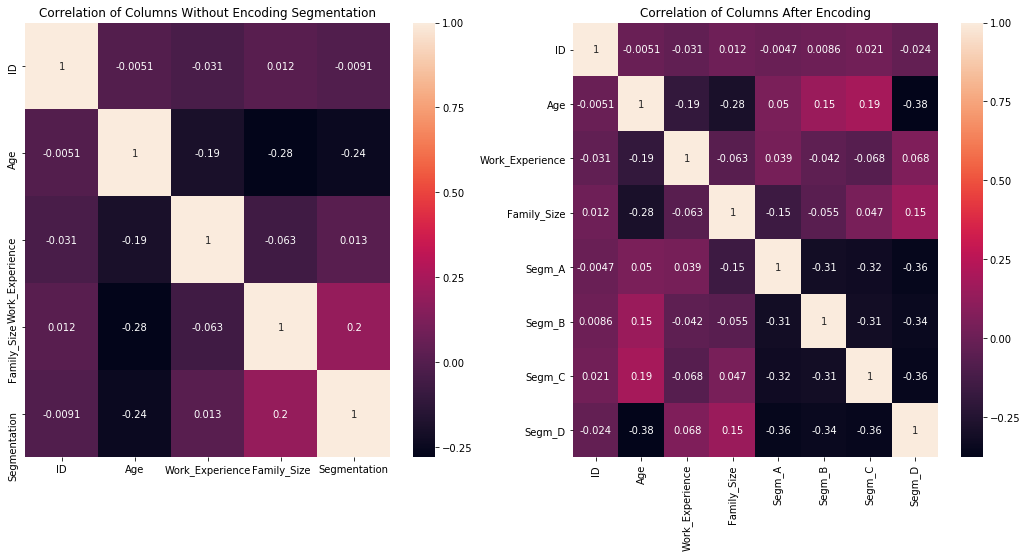

In [18]:
plt.figure(figsize = (18,8))

plt.subplot(1,2,1)
plt.title('Correlation of Columns Without Encoding Segmentation')
sns.heatmap(trMod.corr(), annot=True)

plt.subplot(1,2,2)
plt.title('Correlation of Columns After Encoding')
sns.heatmap(oneHot2.corr(), annot=True)

#### Comments

__1. Correlation Before Encoding the Segmentation Columns (Left)__

- The higher the Family_Size, the more tendency for the customer to be in the higher segmentation (either C or D).
- The lower the Family_Size, more tendency of user to be in Segmentation A or B.
- Work_Experience seems to influence only a little on the segmentation, but we found out that there is 1.3% of tendency towards Segmentation D if the Work_Experience is of a higher value.
- The younger the customer (Age) seems to have more tendency to be in Segmentation A or B. The influence is quite high, which is 24%.

__2. Correlation After Encoding the Segmentation Columns (Right)__

- Segmentation A seems to be influenced the most by Family_Size(-15%). The lower the Family_Size, the more tendency of users to be segmented there. Whereas the higher the Family_Size, the more tendency towards Segmentation D (15%). Segmentation C is only affected by 4.7%, whereas Segmentation B is affected by -5.5% whenever Family_Size increases.
- Age has quite a significant influence towards Segmentation. The higher the age, the less tendency to be in Segmentation D (-38%), whereas the older customers tend to be divided in Segmentation B (15%) and C (19%). The younger customers probably tend to be in Segmentation A and D.
- The more Work_Experience, the more tendency towards Segmentation A and B (3.9% and 6.8%). However, it seems like it's not that impactful as Age.

__Notes__
- However, this correlation is based on only simulating the numerical value. We have to investigate further whether the other 6 columns have more influence towards the Segmentation.
- Also to be noted, the data used has null values in Working_Experience (10%) and Family_Size (4.15%) which may affect the correlation too.

__A.3. Categorical Data__

- The data has 11 columns, which are 'ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation'.
- Since 'Segmentation' is the target for the model, we exclude it. Same as 'ID', since it's not really the customer's preferences or historical data.
- 5 out of 9 columns are categorical, so before encoding and filling the null values, we have to analyze further into it.

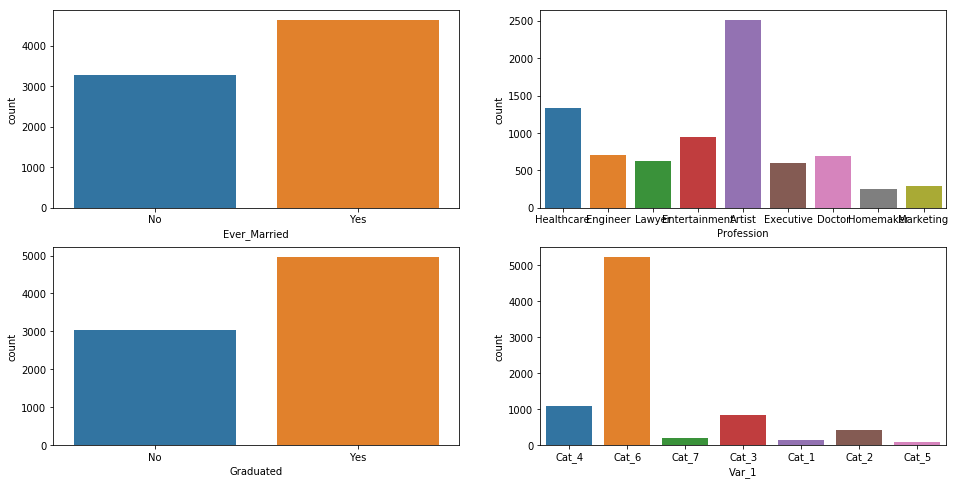

In [19]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.countplot(trMod['Ever_Married'].dropna())

plt.subplot(2,2,2)
sns.countplot(trMod['Profession'].dropna())

plt.subplot(2,2,3)
sns.countplot(trMod['Graduated'].dropna())

plt.subplot(2,2,4)
sns.countplot(trMod['Var_1'].dropna())

From the bar plots above, we can see that most of the data lies in the Customers that have/Ever_Married. Also, 62.2% of the Customers have graduated where the rest 37.8% haven't.

Most of the Customers seems to have Profession as an Artist (2516), then followed by Healthcare (1332). The third among this is customers who works in Entertainment industry (949), followed by Enginer (688), Doctor (623), and Lawyer (599). The rest is in Marketing and Homemaker industry.

From the anonymised data, which is 'Var_1', we can see that most Customers are in Cat_6 (5238) tremendously, followed by Cat_4 (1089) and Cat_3 (822). The least customers are in Cat_1 and Cat_5. Perhaps this Var_1 has quite a great influence towards the Customer Segmentation.

To see further into this, let's break it down one by one.

In [20]:
def plotting(y_, hue_, data_):
    g = sns.catplot(y=y_, hue=hue_, kind="count",
                palette ="Set2", data=data_, 
                height=6, aspect=11.7/9)

    plt.title(f'Distribution of {hue_} in Terms of {y_}')
    plt.xlabel("Frequency")

    total = len(trMod["Segmentation"])
    for ax in g.axes.ravel():
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.04
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.grid(True)

__I. Ever_Married__

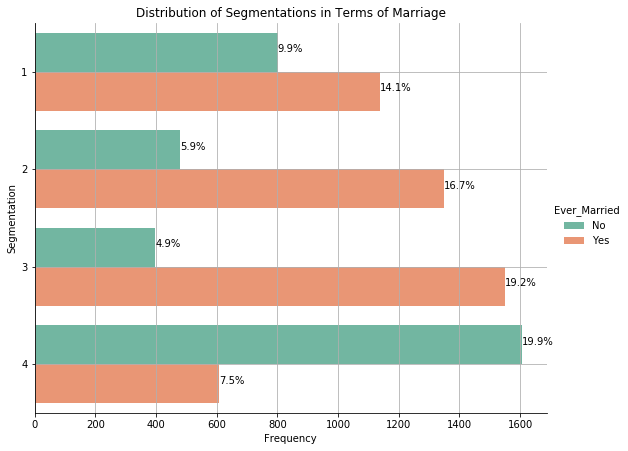

In [21]:
g = sns.catplot(y="Segmentation", hue="Ever_Married", kind="count",
            palette ="Set2", data=trMod, 
            height=6, aspect=11.7/9)

plt.title('Distribution of Segmentations in Terms of Marriage')
plt.xlabel("Frequency")

total = len(trMod["Segmentation"])
for ax in g.axes.ravel():
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.04
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.grid(True)

__Comments on Ever_Married Distribution__

There are 140 null data, which contributes to 1.74% of the overall data.
The values are either 'Yes' or 'No'.

- In Segmentation A, B, and C, most of the customers are married.
- In Segmentation A, there is only 4.2% difference between the "Yes" (14.1%) and "No" (9.9%).
- In Segmentation B, the difference are quite significant, where the "Yes" is almost 3 times of the "No".
- Segmentation C seems to have the most significance, the difference between the "Yes" values are almost 4 times of the "No" values.
- Segmentation D seems to be the one very different, where most the customers are not married (19.9%). Also, of all the 8 segmentations, the most numbers can be found in Segmentation D Ever_Married "No".
- The top 3 are Segmentation D "No", Segmentation C "Yes", and Segmentation B "No" with the numbers of 19.9%, 19.2% and 16.7% respectively.

In [22]:
# Change the value of Ever_Married into number
# X_ will be the final target for the simulation
# For the moment, the null value will be filled with "-1".

X_ = dfTr.copy(deep=True)
X_['Ever_Married'] = X_['Ever_Married'].apply(lambda val: 1 if val == 'Yes' else (0 if val == 'No' else -1))
X_.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,1,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,1,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,1,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,1,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [23]:
dfTr.Age.describe()

count    8068.000000
mean       43.466906
std        16.711696
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

In [24]:
dfTr[dfTr["Age"]>=40]['Ever_Married'].value_counts()

Yes    3486
No      699
Name: Ever_Married, dtype: int64

In [25]:
dfTr[dfTr["Age"]<40]['Ever_Married'].value_counts()

No     2586
Yes    1157
Name: Ever_Married, dtype: int64

__II. Graduated__

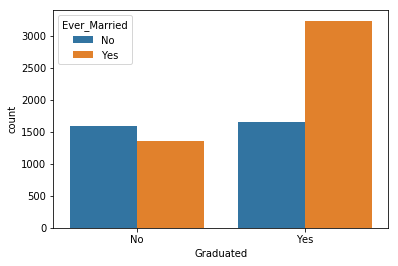

In [26]:
sns.countplot(dfTr["Graduated"].dropna(), hue = dfTr["Ever_Married"])

The distribution of customers that have not Graduated is quite even where the Ever_Married is "No". However it's quite significant on the Graduated customers, whereas they are mostly married, with the value twice the customers that are single.

Let's take a look even more.

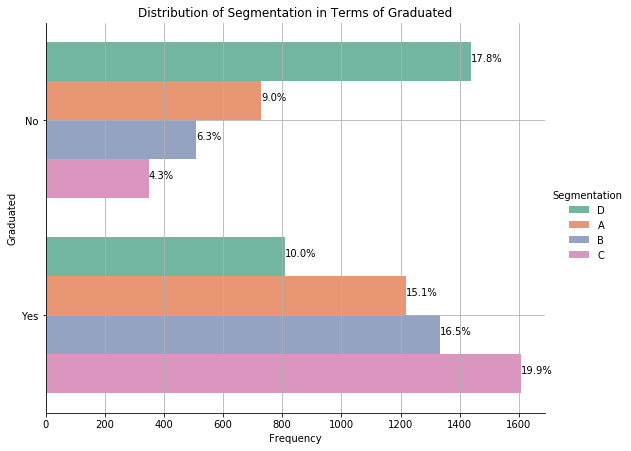

In [27]:
plotting("Graduated", "Segmentation", dfTr)

- The customers that have not Graduated, seems to be occupied by Segmentation D with the value of 17.8%. After that are followed by A, B, C respectively with each values less than 10%.

- The customers that have Graduated, is mostly in Segmentation C with the number of 19.9%. After that are followed by Segmentation B and A, and lastly are Segmentation D.

- From here, we can conclude that most Customers that have Graduated tend to be in Segmentation C, B and A. Whereas those who have not Graduated tend to be in Segmentation D.


In [28]:
# Change the value of Graduated into number
# X_ will be the final data for the simulating the target (Y)
# For the moment, the null value will be filled with "-1".

X_['Graduated'] = X_['Graduated'].apply(lambda val: 1 if val == 'Yes' else (0 if val == 'No' else -1))
X_.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,NaN,High,6.0,Cat_6,A


__III. Spending_Score__

In [29]:
print(dfTr['Spending_Score'].unique())
print(dfTr.Spending_Score.isnull().sum())

['Low' 'Average' 'High']
0


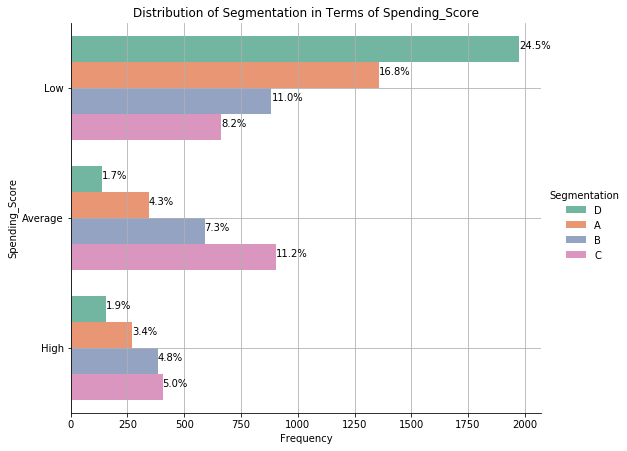

In [30]:
plotting("Spending_Score", "Segmentation", dfTr)

#### Comments

- Segmentation D - Spending_Score Low occupies almost 25% of the data. And in S_S Average and High, always ranks the lowest. Therefore, we can conclude that Segmentation D tends to spend the lowest among all Segmentation. Which may be not really profitable towards the automobile company. Needs to target less Segmentation D.

- Segmentation C seems to often spend High or Average. In S_S Average, Segmentation C adds up the most, 11.2%. Whereas in S_S High contributes towards 5% of the data, which is around 800 customers.

- Segmentation B always ranks 2 in Average and High Spending_Score. In S_S high, it is almost similar to Segmentation D, which is 4.8%. Whereas in S_S Average also quite high, which is 7.3%.

- Segmentation A also tends to spend low, contributing to 16.8% of the whole data. However, the amount of customers in Segmentation A who spends high also quite high comparing to the others, which is 3.4%.

- Based on this, the __most profitable__ are in this order: Segmentation C, Segmentation B, Segmentation A, Segmentation D. The model built needs to predict what kind of Customers tend to fall in __Segmentation C and B.__

Since Spending_Score seems to be the most significant features in the Business Decision, let's evaluate this features further.

In [31]:
print(dfTr.groupby("Spending_Score")["Graduated"].value_counts())
print("\n")
print(dfTr.groupby("Spending_Score")["Ever_Married"].value_counts())
print("\n")
print(dfTr.groupby("Spending_Score")["Gender"].value_counts())

Spending_Score  Graduated
Average         Yes          1450
                No            503
High            Yes           780
                No            425
Low             Yes          2738
                No           2094
Name: Graduated, dtype: int64


Spending_Score  Ever_Married
Average         Yes             1937
High            Yes             1176
Low             No              3285
                Yes             1530
Name: Ever_Married, dtype: int64


Spending_Score  Gender
Average         Male      1143
                Female     831
High            Male       726
                Female     490
Low             Male      2548
                Female    2330
Name: Gender, dtype: int64


- From the data above, we can see that customers who have graduated are always higher than the not-graduated customers on every Spending Score. The most significant value can be found in Spending Score Average, with almost 3 times of the customers have graduated. However, in the low Spending Score we can see that it's almost similar with the ratio of the not graduated and graduated around 56%:43%.

- Customers who have never married are mostly distributed in Low Spending Score, which is 41.4% of all the customers. The rest 58.6% of the customers are distributed evenly in all types of Spending Score, with the most fall on Spending Score Average and Low, with the least found in Spending Score High.

- Based on Gender, between Male and Female, Male seems to have more tendency to Spending more in High and average. In the low spending score we can see that both Male and Female are evenly distributed.

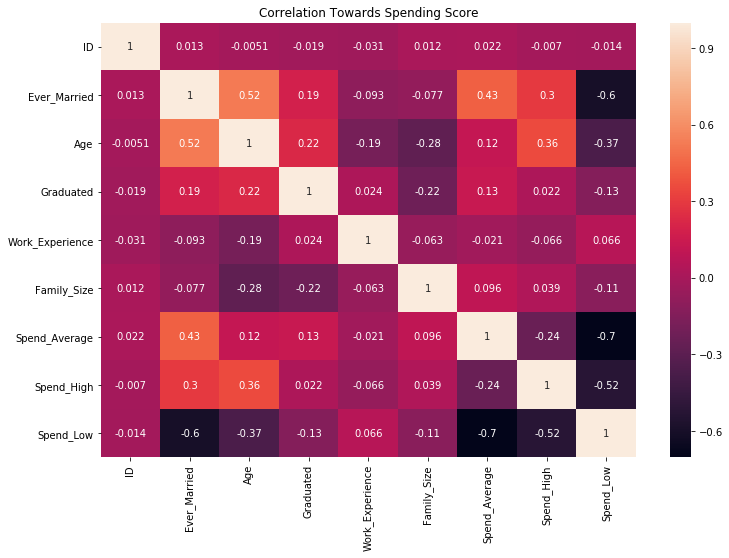

In [32]:
# Label Encoding Spending_Score Column

oneHsp = X_.copy(deep=True).drop('Segmentation', axis=1)
oneHsp['Spending_Score'] = pd.Categorical(oneHsp['Spending_Score'])
dfDummies = pd.get_dummies(oneHsp['Spending_Score'], prefix = 'Spend')
oneHsp_ = pd.concat([oneHsp, dfDummies], axis=1).drop('Spending_Score',
                                                       axis = 1)

# Plotting the Correlation

plt.figure(figsize=(12,8))
plt.title('Correlation Towards Spending Score')
sns.heatmap(oneHsp_.corr(), annot=True)

In [33]:
oneHsp_.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Spend_Average,Spend_High,Spend_Low
0,462809,Male,0,22,0,Healthcare,1.0,4.0,Cat_4,0,0,1
1,462643,Female,1,38,1,Engineer,NaN,3.0,Cat_4,1,0,0
2,466315,Female,1,67,1,Engineer,1.0,1.0,Cat_6,0,0,1
3,461735,Male,1,67,1,Lawyer,0.0,2.0,Cat_6,0,1,0
4,462669,Female,1,40,1,Entertainment,NaN,6.0,Cat_6,0,1,0


__Comments on Spending_Score__

- Marriage seems to affect most in Spending_Average, the Single Customers tend to spend average or High. The influence is quite high, 43% effects on Spending_Average and 30% on Spending_High. 

- Age also plays quite an important role. The older the Age, the more tendency to Spend_High (36%). Whereas the younger the Age, more tendency to Spend_Low (-37%). 

- Graduated Customers tend to spend average, but it doesn't impact significantly on High Spending Score. Thus, the degree of customers don't really influence much on the Spending Score.

- Work Experience also doesn't influence much, the more experience the customer has, the more tendency to spend low. However, it's not that much relevant, since the correlation is below 7%.

- Family Size is also quite similar like Work Experience, influencing less than 10%. However, we can see the pattern that the higher the Family Size, the more tendency to Spend Average (9.6%) and High (3.9%). Unfortunately, it's not as impactful as Marriage and Age.


In [34]:
# Change the value of Spending_Score into number
# Since it is ordinal data, we can use manual Encoder to speed up the model later on

X_2 = X_.copy(deep=True)
X_2['Spending_Score'] = X_['Spending_Score'].apply(lambda val: 2 if val == 'High' else (1 if val == 'Average' else 0))

# Change the value of Gender into number
# Since Male tends to spend more, we label Male as 1 and Female as 0

X_3 = X_2.copy(deep=True)
X_3['Gender'] = X_['Gender'].apply(lambda val: 1 if val == 'Male' else 0)
X_3.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,0,1,38,1,Engineer,NaN,1,3.0,Cat_4,A
2,466315,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,0,1,40,1,Entertainment,NaN,2,6.0,Cat_6,A


In [35]:
# Current X information
# Ever_Married, Graduated, Profession, Work_Experience, Family_Size and Var_1 still consisted of Null Values
# Needs to be cleansed later on after analyzation is done

describeDF(X_3)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,8068,"[462809, 462643, 466315, 461735, 462669]"
1,Gender,int64,0,0.00,2,"[1, 0]"
2,Ever_Married,int64,0,0.00,3,"[0, 1, -1]"
3,Age,int64,0,0.00,67,"[22, 38, 67, 40, 56]"
4,Graduated,int64,0,0.00,3,"[0, 1, -1]"
5,Profession,object,124,1.54,9,"[Healthcare, Engineer, Lawyer, Entertainment, ..."
6,Work_Experience,float64,829,10.28,15,"[1.0, nan, 0.0, 4.0, 9.0]"
7,Spending_Score,int64,0,0.00,3,"[0, 1, 2]"
8,Family_Size,float64,335,4.15,9,"[4.0, 3.0, 1.0, 2.0, 6.0]"
9,Var_1,object,76,0.94,7,"[Cat_4, Cat_6, Cat_7, Cat_3, Cat_1]"


__IV. Var_1 Column__

- Var_1 is one of the customer's anonymised features that is confidential, the factor X of the Segmentation. Although we know nothing about what kind of information lies within this category, let's see the distribution and influence towards Customer Segmentation.

- 0.94% of the data obtained for Var_1 contains null values.

In [36]:
round(dfTr.Var_1.isnull().sum()/len(dfTr.Var_1)*100,2)

0.94

In [37]:
dfTr.groupby("Segmentation")["Var_1"].value_counts().unstack()

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,
A,31,83,223,333,19,1213,51
B,26,106,186,232,20,1232,43
C,26,99,154,109,18,1496,47
D,50,134,259,415,28,1297,62


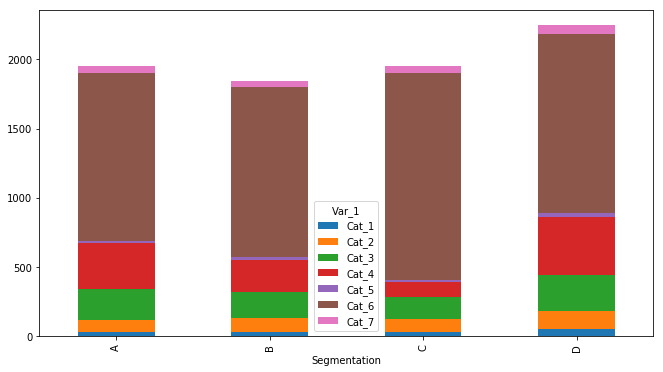

In [38]:
df_plot = dfTr.groupby(['Var_1', 'Segmentation']).size().reset_index().pivot(columns='Var_1', index='Segmentation', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(11,6))

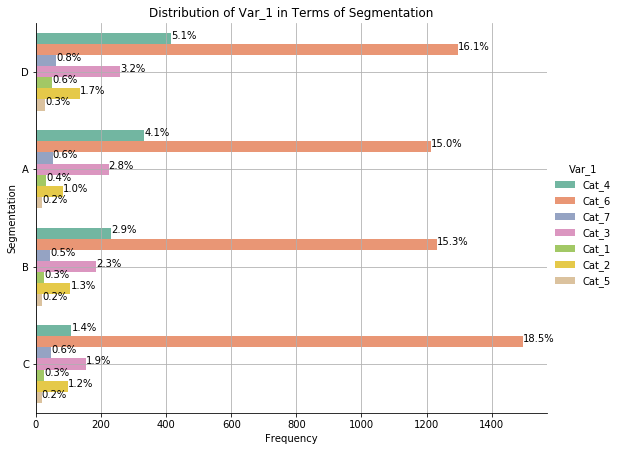

In [39]:
plotting("Segmentation", "Var_1", dfTr)

__Conclusion__

- Of all the Segmentations, most customers are in Cat_6. Thus, Cat_6 is the modes in this data.
- Cat_1 seems to always be the least in every Segmentations.
- Cat_4 ranks #2 in influencing the Segmentations, except in Segmentation C, where Cat_3 has a little more influence (1.9%) than Cat_4 (1.4%).
- Cat_2 seems to distribute evenly towards every Segmentations, with the values of 1.0% up to 1.7%.
- Thus, we can conclude that if the customer tends to have Cat_3 more than Cat_4, it seems that the customer tends to move towards Segmentation C. However, of all the Var_1, the highest tendency still in Cat_6, with the values ranging from 15% up to 18.5% of the users.
- It is better to use OneHotEncoder to encode this features to avoid confusion of the model later on.

__V. Profession__

Profession column has 1.54% of null values, and 9 unique values excluding null.

In [40]:
dfTr.groupby("Segmentation")["Profession"].value_counts().unstack()

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Segmentation,,,,,,,,,
A,558,199,259,365,125,106,73,197,57
B,756,143,189,221,183,101,55,158,30
C,1065,140,75,148,175,146,28,140,35
D,137,206,176,215,116,979,90,128,170


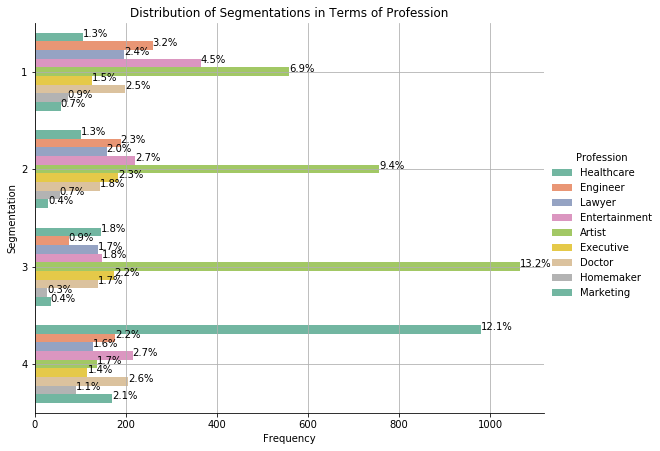

In [41]:
# Profession Distribution

g = sns.catplot(y="Segmentation", hue="Profession", kind="count",
            palette ="Set2", data=trMod, 
            height=6, aspect=11.7/9)

plt.title('Distribution of Segmentations in Terms of Profession')
plt.xlabel("Frequency")

total = len(trMod["Segmentation"])
for ax in g.axes.ravel():
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.04
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.grid(True)

__Comments__

- Segmentation C and B is filled mostly with customers that work as Artist, followed by Entertainment. The difference between Artist and the other Professions are quite significant.
- In Segmentation C, there are 13.2% of customers that are Artist, whereas the other Profession falls under 2.3% of the population. In Segmentation D also, there are 9.4% that are Artist, and the other falls under 2.8%.
- The most distinctive difference between Segmentation C and B, is in Segmentation C the #2 of Profession is Executive, followed by Entertainment on #3. Whereas in Segmentation B, the #2 is Entertainment, followed by both Engineer and Executive on #3.
- The distribution in Segmentation A is quite evenly between Artist, Entertainment, and Engineer with the values of 6.9, 4.5 and 3.2 respectively. The least number is with Marketing and Homemaker, with the value of 0.7 and 0.9.
- Of all the distribution, Segmentation D seems to have quite distinctive feature. It is mostly occupied by Healthcare (12.1%) followed by Entertainment, Doctor, Engineer, and finally Artist. The healthcare profession has around 6 times of customers compare to the other professions. The least in here is Homemaker.

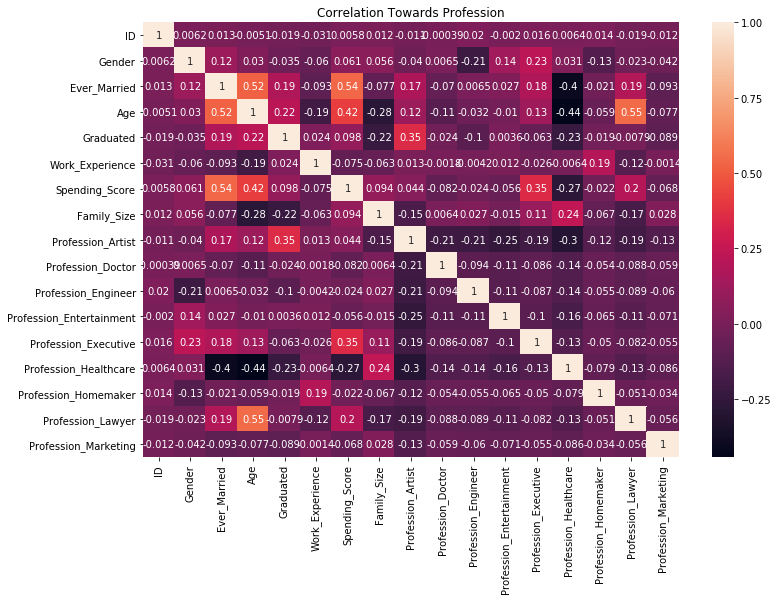

In [42]:
# Label Encoding Profession Column

oneHprf = X_3.copy(deep=True).drop('Segmentation', axis=1)
oneHprf['Profession'] = pd.Categorical(oneHsp['Profession'])
dfDummies = pd.get_dummies(oneHprf['Profession'], prefix = 'Profession')
oneHprf_ = pd.concat([oneHprf, dfDummies], axis=1).drop('Profession',
                                                       axis = 1)

# Plotting the Correlation

plt.figure(figsize=(12,8))
plt.title('Correlation Towards Profession')
sns.heatmap(oneHprf_.corr(), annot=True)

In [43]:
dfTr.groupby("Spending_Score")["Profession"].value_counts().unstack()

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Spending_Score,,,,,,,,,
Average,1011,177,221,319,75,42,60,18,17
High,242,31,60,46,398,45,26,324,33
Low,1263,480,418,584,126,1245,160,281,242


In [44]:
dfTr.groupby("Gender")["Profession"].value_counts().unstack()

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Gender,,,,,,,,,
Female,1213,304,559,253,32,557,203,307,164
Male,1303,384,140,696,567,775,43,316,128


- Executives and Lawyers are dominated with the behaviour of High Spending_Score. The majority of other professions tend to have Low Spending_Score, followed by Average.
- All professions seem to have the majority of Male gender, except Engineer (559 female 140 male), Homemaker (203 F 43 M) and Marketing (164F 128M)

### __3. Data Cleansing and Preparation__

In [553]:
print(dfTr[["Ever_Married", "Graduated", "Profession", "Work_Experience", "Family_Size", "Var_1"]].isnull().sum())

Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64


In [585]:
null1 = dfTr.copy(deep = True)
print("Dataframe shape including null values", null1.shape)
null2 = null1.copy(deep = True).dropna()
print("Dataframe shape dropping null values", null2.shape)
print("The amount of data missing :", round((8068-6665)/8068*100, 2), "%")

Dataframe shape including null values (8068, 11)
Dataframe shape dropping null values (6665, 11)
The amount of data missing : 17.39 %


- Null values percentage in order is as follow:
    1. Work_Experience - 10.28%
    2. Family_Size - 4.15%
    3. Ever_Married - 1.74%
    4. Profession - 1.54%,2
    5. Graduated - 0.97%
    6. Var_1 - 0.94%
- There will be a lot of assumptions in order to fill these missing values, but we can't drop/delete these values since we will lose about 17.39% of the data and it might affect the model significantly.

#### __3.A. Filling the Missing Values__

__3.a. Var_1__

In [825]:
# Check rough Correlation using one hot encoder
# Downside of this method is the null values will disappear

# Label Encoding Var_1 Column

oneHvar = oneHprf_.copy(deep=True)
oneHvar['Var_1'] = pd.Categorical(oneHvar['Var_1'])
dfDummies = pd.get_dummies(oneHvar['Var_1'], prefix = 'Var')
oneHvar_ = pd.concat([oneHvar, dfDummies], axis=1).drop('Var_1',
                                                       axis = 1)

dfCorr = oneHvar_.corr(method='pearson')[17:].T.drop('ID', axis=0)

# Printing Top 3 features that contributes to the correlation of each respective Category

for i in dfCorr.columns:
    print("\t", i)
    print(round(dfCorr[i].sort_values(ascending=False).head(4)[1:5],4).to_string(),"\n")

	 Var_Cat_1
Profession_Marketing    0.0166
Family_Size             0.0159
Profession_Executive    0.0116 

	 Var_Cat_2
Profession_Healthcare    0.0845
Family_Size              0.0820
Work_Experience          0.0146 

	 Var_Cat_3
Profession_Homemaker        0.0547
Profession_Marketing        0.0510
Profession_Entertainment    0.0360 

	 Var_Cat_4
Family_Size              0.1679
Profession_Engineer      0.1414
Profession_Healthcare    0.0324 

	 Var_Cat_5
Family_Size              0.0494
Profession_Healthcare    0.0260
Profession_Homemaker     0.0241 

	 Var_Cat_6
Age                  0.1975
Graduated            0.1867
Profession_Lawyer    0.1221 

	 Var_Cat_7
Family_Size              0.0400
Profession_Doctor        0.0246
Profession_Healthcare    0.0224 



__3.b. Family_Size__

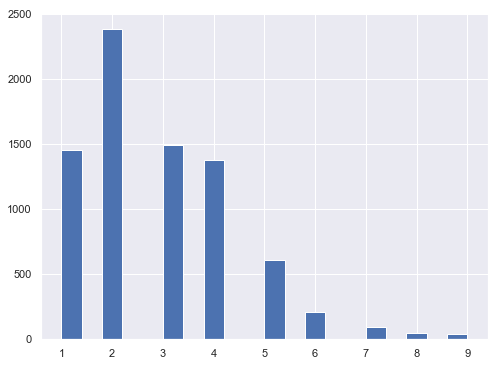

In [714]:
dfTr['Family_Size'].hist(bins=20, figsize=(8,6))
plt.show()

In [709]:
dfTr.Family_Size.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

count    7733.000000
mean        2.850123
std         1.531413
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

__3.a. Work_Experience__

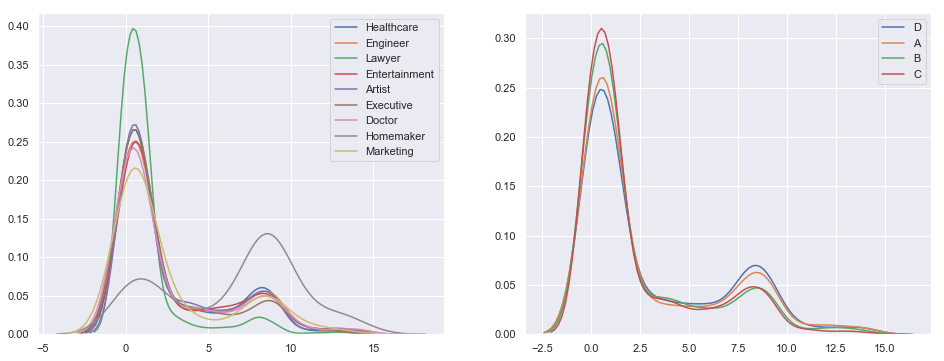

In [664]:
plt.figure(figsize=(16,13))

plt.subplot(2,2,1)
for i in list(dfTr.Profession.unique())[:-1]:
    sns.kdeplot(trMod[trMod['Profession']==i]['Work_Experience'].dropna(), label=i)
    
plt.subplot(2,2,2)
for i in list(dfTr.Segmentation.unique()):
    sns.kdeplot(dfTr[dfTr['Segmentation']==i]['Work_Experience'].dropna(), label=i)

In [663]:
dfTr.Work_Experience.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
90%         8.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

- Segmentation D has people with relatively more experienced people compare to the other segments. While Segmentation C has the most low experience of working out of all the segmentation. 
- Although Work_Experience ranging from 0 up to 15, most of the values can be found in less than 2, or 7 to 8.  The value above 8 seems to be outliers.
- However, the Work_Experience above 2 seems to only contributes less than 0.1 of the data, whereas Work_Experience above 2 reach estimatedly 0.3 of the data.
- This can also be confirmed when dividing the Work_Experience with the percentile above. It can be seen that 50% of the Customers have 0 to 1 Work_Experience. 
- It is starting from the last 25% of the data the variety can be found, ranging from 4 up to 14. Which affects the mean to be 2.64.
- Since it is difficult and would take much longer time to find which features affect the value of Work_Experience, I decided to use the fillna() method. 

In [693]:
dfTr = dfTr.copy(deep=True)
dfTr['Work_Experience'] = dfTr['Work_Experience'].fillna(method='pad')
dfTr.Work_Experience.describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.82, 0.85, 0.9, 0.99])

count    8068.000000
mean        2.618741
std         3.394284
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
80%         6.000000
82%         7.000000
85%         8.000000
90%         8.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [689]:
dfTr.Work_Experience.isnull().sum()

0

- It seems there are only a slight change in the mean and standard deviation, thus we continue with this method.
- Since the unique values are quite various but the frequency seems to stack up in <2 years of Work_Experience, we take threshold of the 0-50%, 50-0.82% and >0.82%.
- This can be seen from the multimodal frequency distribution which is right/positive skewed.
- To speed up the model prediction, we divide the Work_Experience into 3 categories and turn it into ordinal value. 
- The categorization is also to divide the value of Work_Experience more evenly based on its distribution.

In [694]:
dfTr['Work_Exp_Cat'] = pd.cut(dfTr.Work_Experience,bins=[-1,1,7,15],labels=['Low Exp','Medium Exp','High Exp'])
dfTr.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Exp_Cat
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Low Exp
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Low Exp
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,Low Exp
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,Low Exp
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A,Low Exp


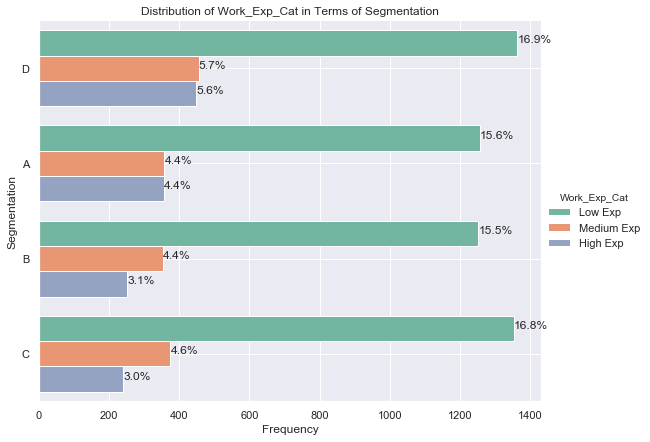

In [698]:
plotting("Segmentation", "Work_Exp_Cat", dfTr)

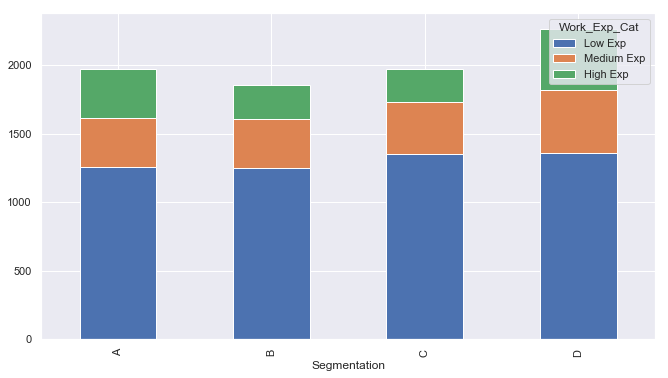

In [695]:
df_plot = dfTr.groupby(['Work_Exp_Cat', 'Segmentation']).size().reset_index().pivot(columns='Work_Exp_Cat', index='Segmentation', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(11,6))

In [622]:
dfLabel = dfTr.copy(deep=True)
dfLabel['Work_Exp_Cat'] = pd.cut(dfTr.Work_Experience, 3, labels=["Low Exp", "Medium Exp", "High Exp"])
dfLabel.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Exp_Cat
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Low Exp
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,NaN
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,Low Exp
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,Low Exp
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,NaN


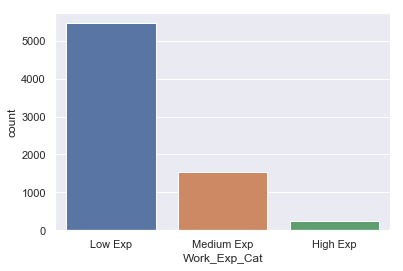

In [626]:
sns.countplot(dfLabel["Work_Exp_Cat"].dropna())

In [642]:
dfLabel[["Work_Experience", "Work_Exp_Cat"]].head(10)

,Work_Experience,Work_Exp_Cat
0,1.0,Low Exp
1,NaN,NaN
2,1.0,Low Exp
3,0.0,Low Exp
4,NaN,NaN
5,0.0,Low Exp
6,1.0,Low Exp
7,1.0,Low Exp
8,0.0,Low Exp
9,1.0,Low Exp


In [612]:
dfTr.Work_Experience.describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

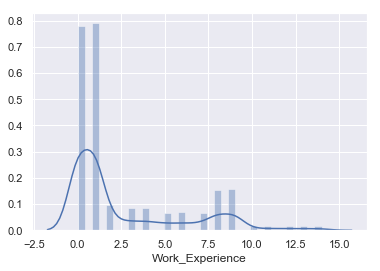

In [604]:
sns.distplot(dfTr["Work_Experience"].dropna())

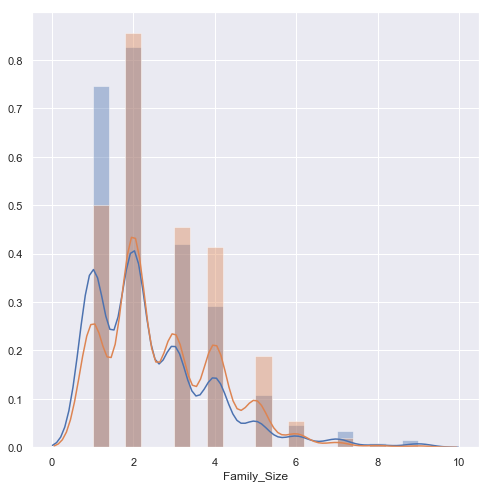

In [597]:
# sns.distplot(dfTr["Family_Size"].dropna())


plt.figure(figsize=(8,8))
sns.distplot(dfTr["Family_Size"].where(dfTr["Segmentation"] =="A").dropna(), bins=20)
sns.distplot(dfTr["Family_Size"].where(dfTr["Attrition"] =="").dropna(), bins=20)
plt.grid(True)

## 4. Data Preprocessing

- In order to simulate data, we first handle the missing values and convert categorical data into number by using Label Encoder/One Hot Encoder.

In [45]:
dfTr.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [69]:
dfNull = describeDF(dfTr)[describeDF(dfTr)['null']>0]
dfNull

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
2,Ever_Married,object,140,1.74,2,"[No, Yes, nan]"
4,Graduated,object,78,0.97,2,"[No, Yes, nan]"
5,Profession,object,124,1.54,9,"[Healthcare, Engineer, Lawyer, Entertainment, ..."
6,Work_Experience,float64,829,10.28,15,"[1.0, nan, 0.0, 4.0, 9.0]"
8,Family_Size,float64,335,4.15,9,"[4.0, 3.0, 1.0, 2.0, 6.0]"
9,Var_1,object,76,0.94,7,"[Cat_4, Cat_6, Cat_7, Cat_3, Cat_1]"


### 4.a. Missing Values

In [88]:
for i in dfNull['dataFeatures']:
    print(i)
    
for i in range(len(dfNull)):
    print(i+1)
    
# for i in dfTr['Ever_Married'].unique():
#     sns.kdeplot(dfTr[dfTr[i] == i])

Ever_Married
Graduated
Profession
Work_Experience
Family_Size
Var_1
1
2
3
4
5
6


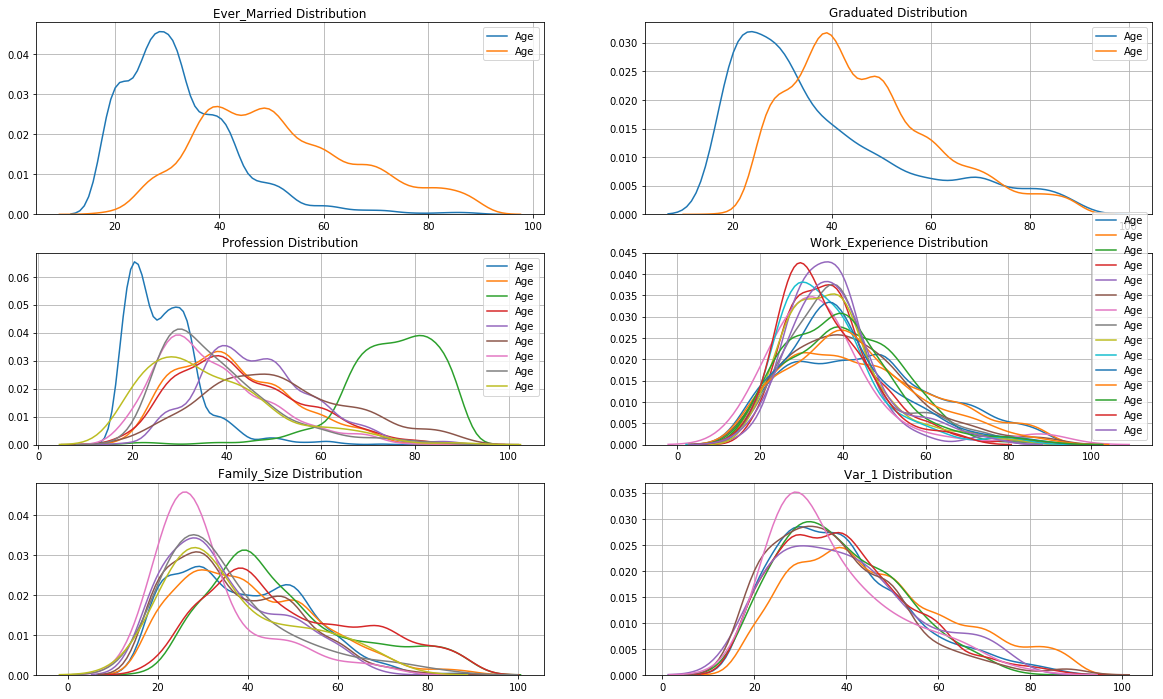

In [113]:
# for i, number in zip(dfNull['dataFeatures'], range(len(dfNull))):
#     for j in dfTr[i].unique():
#         plt.subplot(3, 3, number+1)
#         sns.kdeplot(dfTr[dfTr[i] == j]['Age'], label= j)

# sns.countplot(dfTr['Ever_Married'])


# for i in describeDF(dfTr)[describeDF(dfTr)['null']>0]['dataFeatures']:
#     for j in dfTr[i].unique():
#         sns.kdeplot(dfTr[dfTr[i]== j]['Age'], label = j)

plt.figure(figsize=(20,12))

plt.subplot(3,2,1)
for i in dfTr['Ever_Married'].unique():
    sns.kdeplot(dfTr[dfTr['Ever_Married']== i]['Age']).set_title('Ever_Married Distribution')
    plt.grid(True)

plt.subplot(3,2,2)
for i in dfTr['Graduated'].unique():
    sns.kdeplot(dfTr[dfTr['Graduated']== i]['Age']).set_title('Graduated Distribution')
    plt.grid(True)
    
plt.subplot(3,2,3)
for i in dfTr['Profession'].unique():
    sns.kdeplot(dfTr[dfTr['Profession']== i]['Age']).set_title('Profession Distribution')
    plt.grid(True)
    
plt.subplot(3,2,4)
for i in dfTr['Work_Experience'].unique():
    sns.kdeplot(dfTr[dfTr['Work_Experience']== i]['Age']).set_title('Work_Experience Distribution')
    plt.grid(True)
    
plt.subplot(3,2,5)
for i in dfTr['Family_Size'].unique():
    sns.kdeplot(dfTr[dfTr['Family_Size']== i]['Age'], legend = False).set_title('Family_Size Distribution')
    plt.grid(True)
    
plt.subplot(3,2,6)
for i in dfTr['Var_1'].unique():
    sns.kdeplot(dfTr[dfTr['Var_1']== i]['Age'], legend = False).set_title('Var_1 Distribution')
    plt.grid(True)
    
